In [38]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [39]:
#reading the fits file
hdulist = fits.open('/home/rajkamal/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit')

In [40]:
hdulist.info()
#no of hdus present in file
len(hdulist)

Filename: /home/rajkamal/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


2

In [41]:
pri = hdulist[0]
#reading primary header
pri.header


SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [42]:
#making list of answers for length of axis3, what is it supposed to be, units, telescope , observer name
anslist = [pri.header[i] for i in ['NAXIS3','CTYPE3','CUNIT3','TELESCOP','OBSERVER']]
print (anslist)

[30, 'photon energy', 'MeV', 'GLAST', 'MICHELSON']


In [46]:
#extracting data from primary hdu
pri.data
firstslice = pri.data[0]
print(firstslice)

[[1.20141934e-07 1.19992990e-07 1.19992990e-07 ... 1.17146094e-07
  1.17146094e-07 1.17242180e-07]
 [1.26873346e-07 1.26873346e-07 1.26829207e-07 ... 1.24251599e-07
  1.24325553e-07 1.24325553e-07]
 [1.31679627e-07 1.31590227e-07 1.31542834e-07 ... 1.34925770e-07
  1.34955656e-07 1.35187406e-07]
 ...
 [1.14278869e-07 1.14215226e-07 1.14194677e-07 ... 1.09027361e-07
  1.09093030e-07 1.09137709e-07]
 [1.12280688e-07 1.12280688e-07 1.12276986e-07 ... 1.09685772e-07
  1.09658203e-07 1.09658203e-07]
 [1.09558805e-07 1.09467798e-07 1.09467798e-07 ... 1.09205502e-07
  1.09205502e-07 1.09279974e-07]]


In [49]:
#finding max, min , standard deviatio in firstslice
max_pixel = np.max(firstslice)
min_pixel = np.min(firstslice)
std_pixel = np.std(firstslice)

print (max_pixel,min_pixel,std_pixel)

4.5921523e-05 7.027717e-08 1.3843595e-06


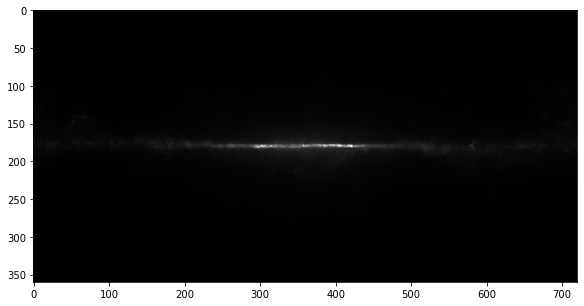

In [65]:
#plotting first slice
plt.imshow(firstslice, cmap = 'gray', vmax = max_pixel, vmin = min_pixel)
plt.show()

In [60]:
# total no of slices in primary hdu
len(pri.data)

30

In [68]:
#adding every 5th slice in primary hdu
slicesum = np.sum(pri.data[4:30:5], axis=0)
print(slicesum)

[[2.3516968e-08 2.3482064e-08 2.3482064e-08 ... 2.2702666e-08
  2.2702666e-08 2.2720966e-08]
 [2.5295501e-08 2.5295501e-08 2.5281855e-08 ... 2.4408171e-08
  2.4428173e-08 2.4428173e-08]
 [2.6761176e-08 2.6732996e-08 2.6712154e-08 ... 2.7219587e-08
  2.7228017e-08 2.7288220e-08]
 ...
 [2.1418089e-08 2.1400616e-08 2.1394175e-08 ... 2.0098749e-08
  2.0123922e-08 2.0143128e-08]
 [2.0756552e-08 2.0756552e-08 2.0753449e-08 ... 1.9953903e-08
  1.9949349e-08 1.9949349e-08]
 [1.9890827e-08 1.9866114e-08 1.9866114e-08 ... 1.9627048e-08
  1.9627048e-08 1.9648057e-08]]


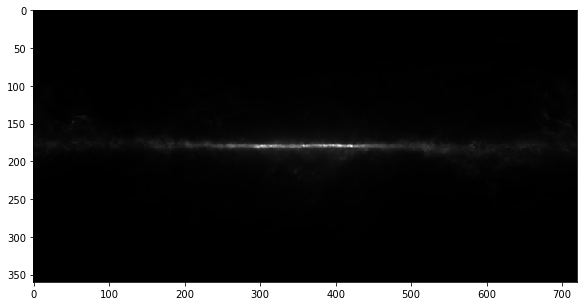

In [69]:
#finding max,min arguments
maxpixel = np.max(slicesum)
minpixel = np.min(slicesum)
plt.imshow(slicesum, cmap='gray', vmax = maxpixel, vmin = minpixel)
plt.show()

In [80]:
#creating altitude function
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

def Altitude (coordinates, time):
    timefinal = time + np.linspace(1,12)*u.hour
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    finalaltitude = coordinates.transform_to(AltAz(obstime = timefinal, location = iitm)).alt
    
    plt.plot(finalaltitude)
    plt.title('altitude plot for 12 hrs')
    return plt.show()